In [1]:
#Part I - Preliminary Wrangling

In [2]:
# import the library

import warnings

import pandas as pd

import numpy as np

import random

import seaborn as sns

import matplotlib.pyplot as plt

import squarify

warnings.filterwarnings('ignore')

from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from pandas import Timestamp

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

from sklearn.metrics import roc_auc_score

from sklearn import preprocessing

from sklearn.metrics import classification_report

import pickle

from sklearn.metrics import roc_curve

from sklearn.metrics import auc

from sklearn import tree

from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import RidgeClassifier

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import NearestCentroid

from sklearn.svm import SVC

In [3]:
# import csv file
df = pd.read_csv('finalclean.csv', encoding='cp1252')

In [4]:
#to show all columns because the 22 column
pd.set_option('display.max_columns', None)
# viewing the first lines
df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS
0,Bytedance,$180B,2017,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2
1,SpaceX,$100B,2012,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2
2,SHEIN,$100B,2018,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2
3,Stripe,$95B,2014,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2
4,Klarna,$46B,2011,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2


In [5]:
# #Part II - probability

In [6]:
df = df[df['Statues'] != 'Acquired/Merged']

In [7]:
df['Statues'].value_counts()

Closed       1148
Operation    1032
Name: Statues, dtype: int64

In [8]:
#to know if the sum of the duplicate
df.duplicated().sum()

0

In [9]:
#info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 2202
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company                  2180 non-null   object
 1   Valuation                2180 non-null   object
 2   Date_Joined_Year         2180 non-null   int64 
 3   Date_Joined              2180 non-null   object
 4   Industry                 2180 non-null   object
 5   City                     2180 non-null   object
 6   Country                  2180 non-null   object
 7   Continent                2180 non-null   object
 8   Year_Founded             2180 non-null   int64 
 9   Funding                  2180 non-null   object
 10  Select_Investors         2180 non-null   object
 11  Headquarters             2180 non-null   object
 12  Statues                  2180 non-null   object
 13  last_Funding_Type        2180 non-null   object
 14  Exit_Investor_Stage      2180 non-null  

In [10]:
#to know the number of unique values in the data in each row
df.nunique()

Company                    2173
Valuation                    29
Date_Joined_Year             12
Date_Joined                 632
Industry                     15
City                        253
Country                      46
Continent                     6
Year_Founded                 35
Funding                     541
Select_Investors           1045
Headquarters                253
Statues                       2
last_Funding_Type           162
Exit_Investor_Stage          12
Investors_Count              55
Deal                         16
Portfolio_Exits               5
Funding_Time_Year            12
Funding_Time                564
Acq                          22
Number_Of_Funding_Round      26
Compatitor                  121
Employee_Number              10
StatueS                       3
dtype: int64

In [11]:
df.value_counts()

Company              Valuation  Date_Joined_Year  Date_Joined  Industry                         City           Country        Continent      Year_Founded  Funding  Select_Investors                                                   Headquarters   Statues    last_Funding_Type       Exit_Investor_Stage  Investors_Count  Deal  Portfolio_Exits  Funding_Time_Year  Funding_Time  Acq  Number_Of_Funding_Round  Compatitor  Employee_Number  StatueS
#waywire             $4B        2021              1/7/2021     Internet software & services     Mississauga    Canada         North America  2000          $230M    Dragoneer Investment Group, Hellman & Friedman, JMI Equity         Mississauga    Closed     Private Equity | Alive  0                    3                1     0                2022               4/1/2022      5    5                        16          5000             2          1
FullStory            $2B        2021              8/4/2021     Internet software & services     Atlanta        

In [12]:
# to know the sum of the NAN value
df.isnull().sum()

Company                    0
Valuation                  0
Date_Joined_Year           0
Date_Joined                0
Industry                   0
City                       0
Country                    0
Continent                  0
Year_Founded               0
Funding                    0
Select_Investors           0
Headquarters               0
Statues                    0
last_Funding_Type          0
Exit_Investor_Stage        0
Investors_Count            0
Deal                       0
Portfolio_Exits            0
Funding_Time_Year          0
Funding_Time               0
Acq                        0
Number_Of_Funding_Round    0
Compatitor                 0
Employee_Number            0
StatueS                    0
dtype: int64

In [13]:
# data quantative describe
df.describe()

,Date_Joined_Year,Year_Founded,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,2020.011009,2013.032110,13.919266,2.811468,0.048624,2020.865596,1.325229,6.484404,21.055046,1599.502752,1.965596
std,1.922516,5.185045,9.193144,1.979880,0.289677,1.570088,2.734245,3.359893,48.640581,2240.165606,0.242766
min,2011.000000,1919.000000,0.000000,0.000000,0.000000,2008.000000,0.000000,1.000000,0.000000,10.000000,0.000000
25%,2019.000000,2011.000000,8.000000,1.000000,0.000000,2021.000000,0.000000,4.000000,6.000000,250.000000,2.000000
50%,2021.000000,2014.000000,12.000000,2.000000,0.000000,2021.000000,0.000000,6.000000,9.000000,500.000000,2.000000
75%,2021.000000,2016.000000,18.000000,4.000000,0.000000,2022.000000,2.000000,8.000000,14.000000,1000.000000,2.000000
max,2022.000000,2021.000000,91.000000,19.000000,5.000000,2022.000000,41.000000,32.000000,643.000000,10001.000000,2.000000


In [14]:
df.shape

(2180, 25)

In [15]:
df.columns

Index(['Company', 'Valuation', 'Date_Joined_Year', 'Date_Joined', 'Industry',
       'City', 'Country', 'Continent', 'Year_Founded', 'Funding',
       'Select_Investors', 'Headquarters', 'Statues', 'last_Funding_Type',
       'Exit_Investor_Stage', 'Investors_Count', 'Deal', 'Portfolio_Exits',
       'Funding_Time_Year', 'Funding_Time', 'Acq', 'Number_Of_Funding_Round',
       'Compatitor', 'Employee_Number', 'StatueS'],
      dtype='object')

In [16]:
df.to_csv('finalcleanencoding.csv', index=False)

In [17]:
# Part III - Univariae Exploration

<AxesSubplot:xlabel='Number_Of_Funding_Round', ylabel='Density'>

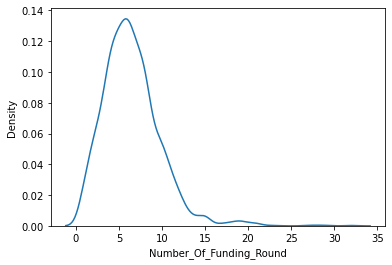

In [18]:
sns.kdeplot(data=df, x="Number_Of_Funding_Round")

<AxesSubplot:xlabel='Statues', ylabel='count'>

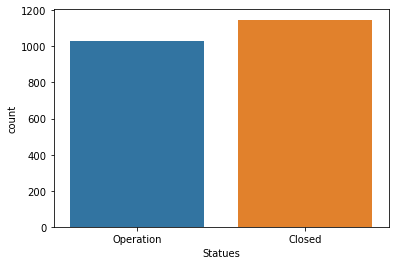

In [19]:
sns.countplot(df['Statues'])

In [20]:
# the private company is the highest precentage

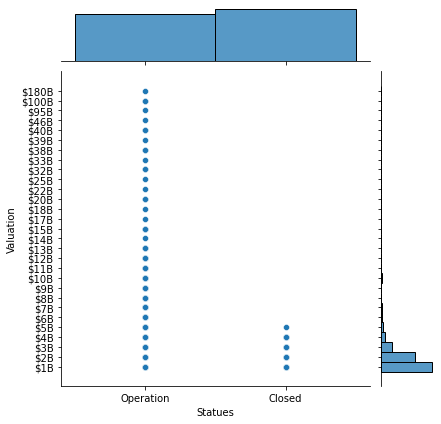

In [21]:
sns.jointplot(x='Statues', y='Valuation', data=df)

In [22]:
# there a positive relationship the private had a highest valuion and the closed the less valution for all the company

In [23]:
Date_Joined_Year = df["Date_Joined_Year"]
Year_Founded = df["Year_Founded"]
df['Become_Unicorn']= Date_Joined_Year - Year_Founded

In [24]:
df.to_csv('finalcleanencoding111.csv', index=False)

In [25]:
df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,$180B,2017,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,$100B,2012,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,$100B,2018,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,$95B,2014,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,$46B,2011,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [26]:
df.groupby(['Statues']).size()

Statues
Closed       1148
Operation    1032
dtype: int64

In [27]:
df.groupby(['Industry']).size()

Industry
Artificial intelligence                177
Auto & transportation\t                 68
Consumer & retail                       54
Cybersecurity                          104
Data management & analytics             80
E-commerce & direct-to-consumer        211
Edtech                                  56
Fintech                                439
Hardware                                68
Health                                 160
Internet software & services           419
Mobile & telecommunications             69
Other                                  118
Supply chain, logistics, & delivery    129
Travel                                  28
dtype: int64

In [28]:
label_encoder = preprocessing.LabelEncoder()
  
df['Valuation']= label_encoder.fit_transform(df['Valuation'])
  
df['Valuation'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [29]:
label_encoder = preprocessing.LabelEncoder()

df['Industry']= label_encoder.fit_transform(df['Industry'])
  
df['Industry'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [30]:
label_encoder = preprocessing.LabelEncoder()

df['Funding']= label_encoder.fit_transform(df['Funding'])
  
df['Funding'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,Beijing,China,Asia,2012,511,"Sequoia Capital China, SIG Asia Investments, S...",Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,Hawthorne,United States,North America,2002,484,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,Shenzhen,China,Asia,2008,177,"Tiger Global Management, Sequoia Capital China...",Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,San Francisco,United States,North America,2010,177,"Khosla Ventures, LowercaseCapital, capitalG",San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,Stockholm,Sweden,Europe,2005,332,"Institutional Venture Partners, Sequoia Capita...",Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [31]:
label_encoder = preprocessing.LabelEncoder()
  
df['City']= label_encoder.fit_transform(df['City'])
  
df['City'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,China,Asia,2012,511,"Sequoia Capital China, SIG Asia Investments, S...",Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,United States,North America,2002,484,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,China,Asia,2008,177,"Tiger Global Management, Sequoia Capital China...",Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,United States,North America,2010,177,"Khosla Ventures, LowercaseCapital, capitalG",San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,Sweden,Europe,2005,332,"Institutional Venture Partners, Sequoia Capita...",Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [32]:
label_encoder = preprocessing.LabelEncoder()
  
df['Country']= label_encoder.fit_transform(df['Country'])
  
df['Country'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,Asia,2012,511,"Sequoia Capital China, SIG Asia Investments, S...",Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,North America,2002,484,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,Asia,2008,177,"Tiger Global Management, Sequoia Capital China...",Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,North America,2010,177,"Khosla Ventures, LowercaseCapital, capitalG",San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,Europe,2005,332,"Institutional Venture Partners, Sequoia Capita...",Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [33]:
label_encoder = preprocessing.LabelEncoder()
  
df['Continent']= label_encoder.fit_transform(df['Continent'])
  
df['Continent'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,"Sequoia Capital China, SIG Asia Investments, S...",Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,"Tiger Global Management, Sequoia Capital China...",Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,"Khosla Ventures, LowercaseCapital, capitalG",San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,"Institutional Venture Partners, Sequoia Capita...",Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [34]:
label_encoder = preprocessing.LabelEncoder()

df['Select_Investors']= label_encoder.fit_transform(df['Select_Investors'])
  
df['Select_Investors'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,795,Beijing,Operation,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,327,Hawthorne,Operation,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,949,Shenzhen,Operation,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,542,San Francisco,Operation,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,496,Stockholm,Operation,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [35]:
label_encoder = preprocessing.LabelEncoder()
  
df['Statues']= label_encoder.fit_transform(df['Statues'])
  
df['Statues'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,795,Beijing,1,Private Equity | Alive,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,327,Hawthorne,1,Angel | Alive,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,949,Shenzhen,1,Growth Equityçˆ˜ Alive,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,542,San Francisco,1,Corporate Minority - II | Alive,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,496,Stockholm,1,Private Equity - IV | Alive,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [36]:
label_encoder = preprocessing.LabelEncoder()
  
df['last_Funding_Type']= label_encoder.fit_transform(df['last_Funding_Type'])
  
df['last_Funding_Type'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,795,Beijing,1,70,Shareholder Liquidity,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,327,Hawthorne,1,6,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,949,Shenzhen,1,41,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,542,San Francisco,1,11,Asset,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,496,Stockholm,1,69,Acquired,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [37]:
label_encoder = preprocessing.LabelEncoder()

df['Exit_Investor_Stage']= label_encoder.fit_transform(df['Exit_Investor_Stage'])
  
df['Exit_Investor_Stage'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,795,Beijing,1,70,10,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,327,Hawthorne,1,6,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,949,Shenzhen,1,41,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,542,San Francisco,1,11,3,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,496,Stockholm,1,69,2,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [38]:
label_encoder = preprocessing.LabelEncoder()

df['Headquarters']= label_encoder.fit_transform(df['Headquarters'])
  
df['Headquarters'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,795,14,1,70,10,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,327,96,1,6,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,949,213,1,41,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,542,197,1,11,3,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,496,220,1,69,2,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [39]:
label_encoder = preprocessing.LabelEncoder()

df['Deal']= label_encoder.fit_transform(df['Deal'])
  
df['Deal'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,795,14,1,70,10,28,8,5,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,327,96,1,6,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,949,213,1,41,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,542,197,1,11,3,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,496,220,1,69,2,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [40]:
label_encoder = preprocessing.LabelEncoder()

df['Portfolio_Exits']= label_encoder.fit_transform(df['Portfolio_Exits'])
  
df['Portfolio_Exits'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,795,14,1,70,10,28,8,4,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,327,96,1,6,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,949,213,1,41,0,8,3,0,2022,4/4/2022,1,6,403,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,542,197,1,11,3,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,496,220,1,69,2,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [41]:
label_encoder = preprocessing.LabelEncoder()

df['Compatitor']= label_encoder.fit_transform(df['Compatitor'])
  
df['Compatitor'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,Bytedance,8,2017,4/7/2017,0,14,9,1,2012,511,795,14,1,70,10,28,8,4,2020,12/11/2020,13,12,0,10001,2,5
1,SpaceX,0,2012,12/1/2012,12,96,44,3,2002,484,327,96,1,6,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,SHEIN,0,2018,7/3/2018,5,213,9,1,2008,177,949,213,1,41,0,8,3,0,2022,4/4/2022,1,6,116,10001,2,10
3,Stripe,27,2014,1/23/2014,7,197,44,3,2010,177,542,197,1,11,3,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,Klarna,21,2011,12/12/2011,7,220,38,2,2005,332,496,220,1,69,2,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [42]:
label_encoder = preprocessing.LabelEncoder()

df['Company']= label_encoder.fit_transform(df['Company'])
  
df['Company'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,1240,8,2017,4/7/2017,0,14,9,1,2012,511,795,14,1,70,10,28,8,4,2020,12/11/2020,13,12,0,10001,2,5
1,1932,0,2012,12/1/2012,12,96,44,3,2002,484,327,96,1,6,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,1870,0,2018,7/3/2018,5,213,9,1,2008,177,949,213,1,41,0,8,3,0,2022,4/4/2022,1,6,116,10001,2,10
3,1950,27,2014,1/23/2014,7,197,44,3,2010,177,542,197,1,11,3,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,1594,21,2011,12/12/2011,7,220,38,2,2005,332,496,220,1,69,2,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [43]:
label_encoder = preprocessing.LabelEncoder()

df['Date_Joined_Year']= label_encoder.fit_transform(df['Date_Joined_Year'])
  
df['Date_Joined_Year'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,1240,8,6,4/7/2017,0,14,9,1,2012,511,795,14,1,70,10,28,8,4,2020,12/11/2020,13,12,0,10001,2,5
1,1932,0,1,12/1/2012,12,96,44,3,2002,484,327,96,1,6,0,29,12,0,2022,8/8/2022,1,32,13,10001,2,10
2,1870,0,7,7/3/2018,5,213,9,1,2008,177,949,213,1,41,0,8,3,0,2022,4/4/2022,1,6,116,10001,2,10
3,1950,27,3,1/23/2014,7,197,44,3,2010,177,542,197,1,11,3,39,12,1,2021,6/1/2021,13,21,0,5000,2,4
4,1594,21,0,12/12/2011,7,220,38,2,2005,332,496,220,1,69,2,62,14,1,2022,7/11/2022,14,28,0,10000,2,6


In [44]:
label_encoder = preprocessing.LabelEncoder()

df['Funding_Time_Year']= label_encoder.fit_transform(df['Funding_Time_Year'])
  
df['Funding_Time_Year'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,1240,8,6,4/7/2017,0,14,9,1,2012,511,795,14,1,70,10,28,8,4,9,12/11/2020,13,12,0,10001,2,5
1,1932,0,1,12/1/2012,12,96,44,3,2002,484,327,96,1,6,0,29,12,0,11,8/8/2022,1,32,13,10001,2,10
2,1870,0,7,7/3/2018,5,213,9,1,2008,177,949,213,1,41,0,8,3,0,11,4/4/2022,1,6,116,10001,2,10
3,1950,27,3,1/23/2014,7,197,44,3,2010,177,542,197,1,11,3,39,12,1,10,6/1/2021,13,21,0,5000,2,4
4,1594,21,0,12/12/2011,7,220,38,2,2005,332,496,220,1,69,2,62,14,1,11,7/11/2022,14,28,0,10000,2,6


In [45]:
label_encoder = preprocessing.LabelEncoder()

df['Year_Founded']= label_encoder.fit_transform(df['Year_Founded'])
  
df['Year_Founded'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,1240,8,6,4/7/2017,0,14,9,1,25,511,795,14,1,70,10,28,8,4,9,12/11/2020,13,12,0,10001,2,5
1,1932,0,1,12/1/2012,12,96,44,3,15,484,327,96,1,6,0,29,12,0,11,8/8/2022,1,32,13,10001,2,10
2,1870,0,7,7/3/2018,5,213,9,1,21,177,949,213,1,41,0,8,3,0,11,4/4/2022,1,6,116,10001,2,10
3,1950,27,3,1/23/2014,7,197,44,3,23,177,542,197,1,11,3,39,12,1,10,6/1/2021,13,21,0,5000,2,4
4,1594,21,0,12/12/2011,7,220,38,2,18,332,496,220,1,69,2,62,14,1,11,7/11/2022,14,28,0,10000,2,6


In [46]:
label_encoder = preprocessing.LabelEncoder()

df['Date_Joined']= label_encoder.fit_transform(df['Date_Joined'])
  
df['Date_Joined'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,1240,8,6,373,0,14,9,1,25,511,795,14,1,70,10,28,8,4,9,12/11/2020,13,12,0,10001,2,5
1,1932,0,1,171,12,96,44,3,15,484,327,96,1,6,0,29,12,0,11,8/8/2022,1,32,13,10001,2,10
2,1870,0,7,518,5,213,9,1,21,177,949,213,1,41,0,8,3,0,11,4/4/2022,1,6,116,10001,2,10
3,1950,27,3,25,7,197,44,3,23,177,542,197,1,11,3,39,12,1,10,6/1/2021,13,21,0,5000,2,4
4,1594,21,0,179,7,220,38,2,18,332,496,220,1,69,2,62,14,1,11,7/11/2022,14,28,0,10000,2,6


In [47]:
label_encoder = preprocessing.LabelEncoder()

df['Funding_Time']= label_encoder.fit_transform(df['Funding_Time'])
  
df['Funding_Time'].unique()

df.head()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
0,1240,8,6,373,0,14,9,1,25,511,795,14,1,70,10,28,8,4,9,160,13,12,0,10001,2,5
1,1932,0,1,171,12,96,44,3,15,484,327,96,1,6,0,29,12,0,11,514,1,32,13,10001,2,10
2,1870,0,7,518,5,213,9,1,21,177,949,213,1,41,0,8,3,0,11,305,1,6,116,10001,2,10
3,1950,27,3,25,7,197,44,3,23,177,542,197,1,11,3,39,12,1,10,365,13,21,0,5000,2,4
4,1594,21,0,179,7,220,38,2,18,332,496,220,1,69,2,62,14,1,11,418,14,28,0,10000,2,6


In [48]:
df.describe()

,Company,Valuation,Date_Joined_Year,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Headquarters,Statues,last_Funding_Type,Exit_Investor_Stage,Investors_Count,Deal,Portfolio_Exits,Funding_Time_Year,Funding_Time,Acq,Number_Of_Funding_Round,Compatitor,Employee_Number,StatueS,Become_Unicorn
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,1085.033028,13.242661,9.011009,311.365596,7.197248,137.614220,31.456422,2.310092,26.078440,222.317890,530.598165,137.614220,0.473394,98.438532,0.131193,13.919266,2.809633,0.048165,9.866972,268.376147,1.325229,6.484404,15.839908,1599.502752,1.965596,6.978899
std,627.044185,4.470424,1.922516,180.376936,3.724026,72.744016,15.333180,0.982261,4.720435,144.195139,298.956776,72.744016,0.499406,35.706716,0.827610,9.193144,1.966679,0.282536,1.560089,160.443839,2.734245,3.359893,21.752742,2240.165606,0.242766,4.850355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,-4.000000
25%,542.750000,10.000000,8.000000,157.750000,5.000000,74.000000,16.000000,1.000000,24.000000,96.000000,277.000000,74.000000,0.000000,87.000000,0.000000,8.000000,1.000000,0.000000,10.000000,129.000000,0.000000,4.000000,6.000000,250.000000,2.000000,4.000000
50%,1084.500000,14.000000,10.000000,305.500000,7.000000,160.000000,44.000000,3.000000,27.000000,197.000000,533.000000,160.000000,0.000000,106.500000,0.000000,12.000000,2.000000,0.000000,10.000000,261.000000,0.000000,6.000000,9.000000,500.000000,2.000000,6.000000
75%,1627.250000,14.000000,10.000000,461.250000,10.000000,197.000000,44.000000,3.000000,29.000000,332.000000,787.000000,197.000000,1.000000,121.000000,0.000000,18.000000,4.000000,0.000000,11.000000,401.000000,2.000000,8.000000,14.000000,1000.000000,2.000000,9.000000
max,2172.000000,28.000000,11.000000,631.000000,14.000000,252.000000,45.000000,5.000000,34.000000,540.000000,1044.000000,252.000000,1.000000,161.000000,11.000000,91.000000,15.000000,4.000000,11.000000,563.000000,41.000000,32.000000,120.000000,10001.000000,2.000000,98.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 2202
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Company                  2180 non-null   int32
 1   Valuation                2180 non-null   int32
 2   Date_Joined_Year         2180 non-null   int64
 3   Date_Joined              2180 non-null   int32
 4   Industry                 2180 non-null   int32
 5   City                     2180 non-null   int32
 6   Country                  2180 non-null   int32
 7   Continent                2180 non-null   int32
 8   Year_Founded             2180 non-null   int64
 9   Funding                  2180 non-null   int32
 10  Select_Investors         2180 non-null   int32
 11  Headquarters             2180 non-null   int32
 12  Statues                  2180 non-null   int32
 13  last_Funding_Type        2180 non-null   int32
 14  Exit_Investor_Stage      2180 non-null   int32
 15  Inve

In [50]:
df.to_csv('finalcleanencoding.csv', index=False)

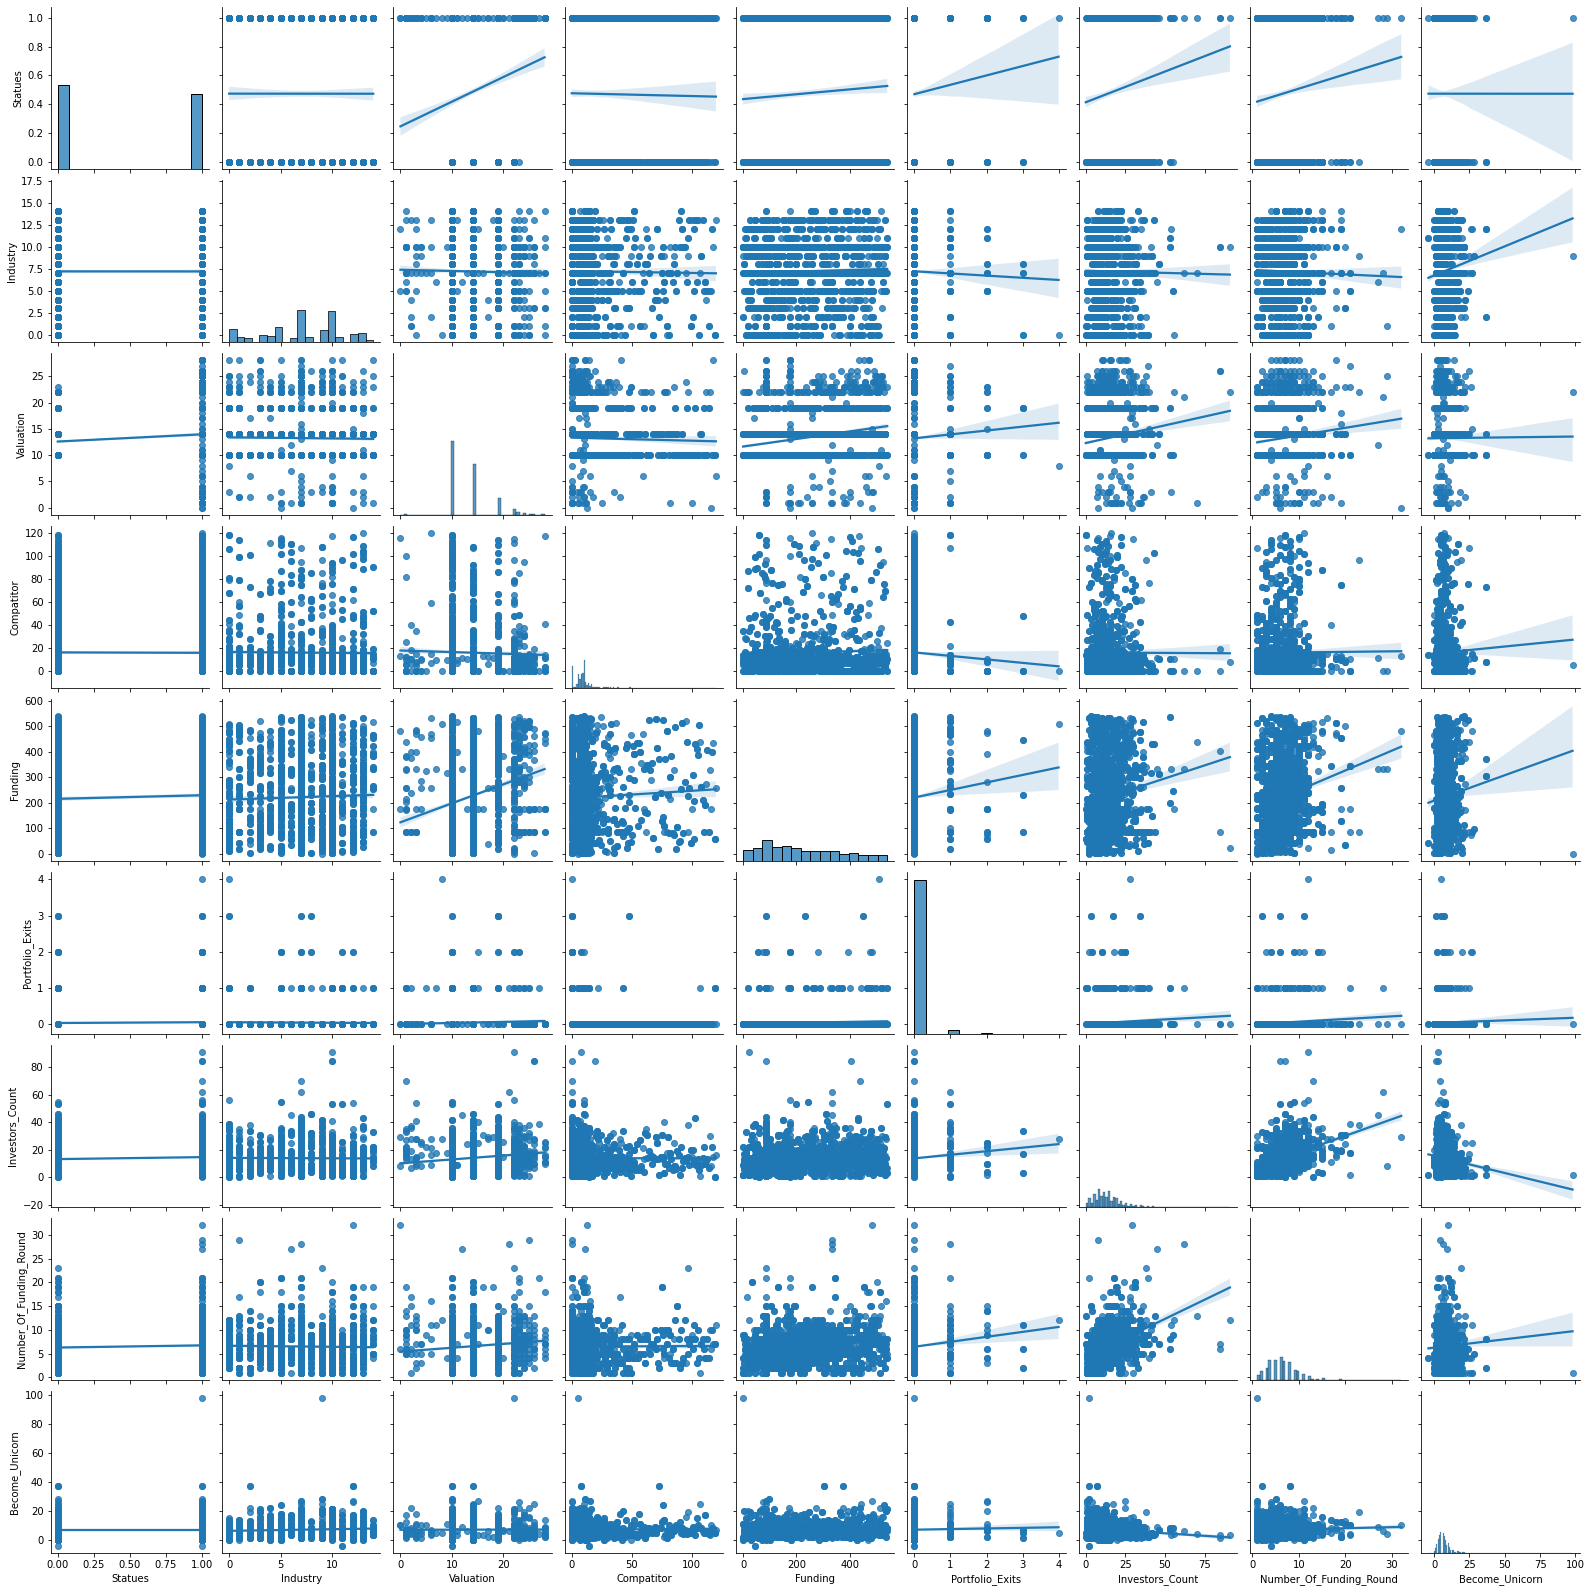

In [51]:
sns.pairplot(df[["Statues", "Industry","Valuation","Compatitor","Funding","Portfolio_Exits","Investors_Count","Number_Of_Funding_Round","Become_Unicorn"]], kind="reg")

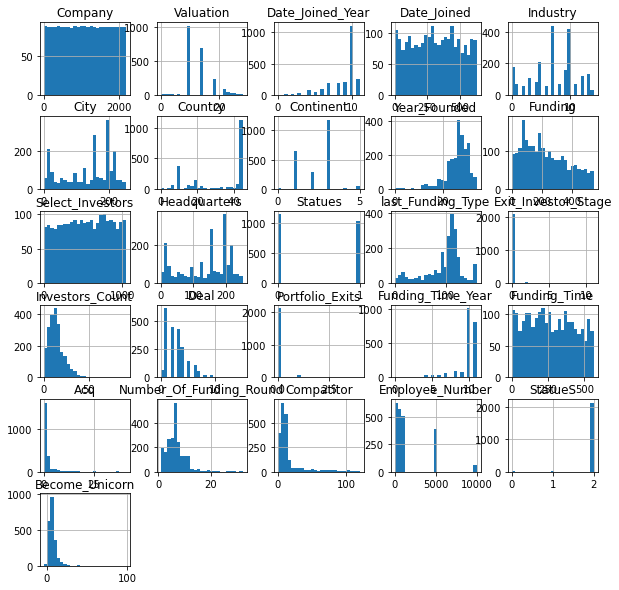

In [52]:
df.hist(bins=25, figsize=(10,10))
plt.show()

<AxesSubplot:>

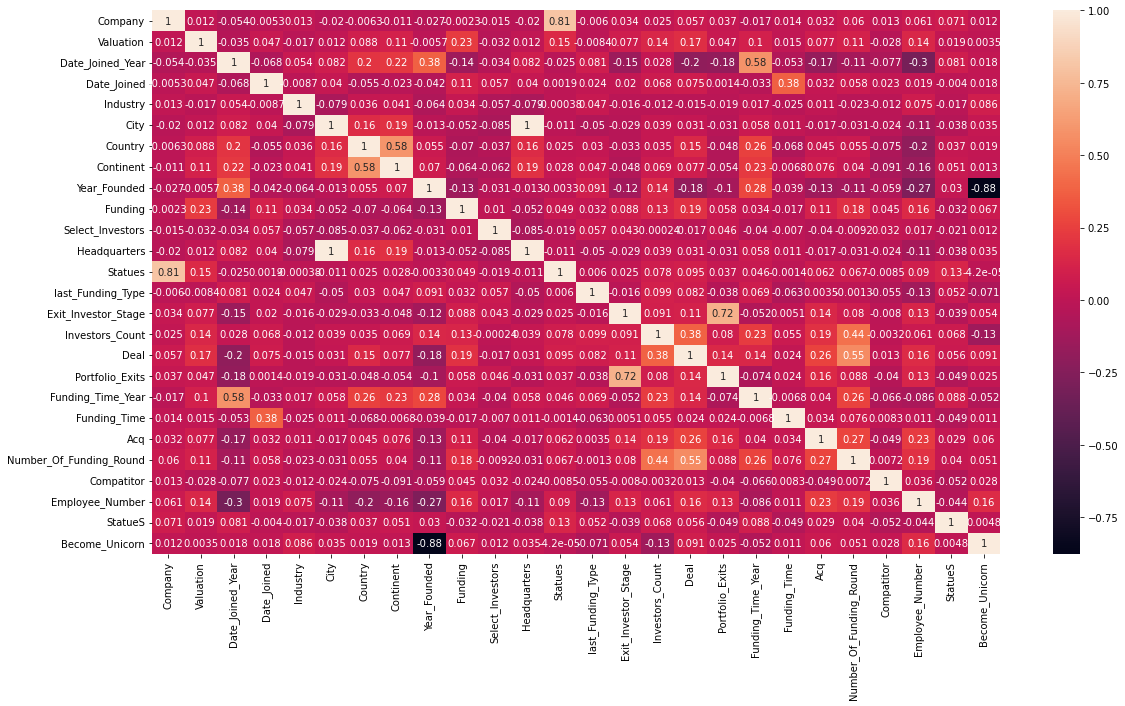

In [53]:
plt.figure(figsize=[19,10],facecolor='white') 
sns.heatmap(df.corr(),annot=True)

In [54]:
len(df['Statues'].unique())

2

In [55]:
# Part IIII -Machine Learning

In [56]:
X = df.drop(["Statues"],axis = 1 )
y = df['Statues']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state =101)

In [58]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (1635, 25)
Shape of the y Train : (1635,)
Shape of the X test : (545, 25)
Shape of the y test : (545,)


# RidgeClassifier Algorithm first model (perfect)

In [96]:
sm = SMOTE()
xres,yres = sm.fit_resample(X_train, y_train)


In [60]:
Ridge = RidgeClassifier()
Ridge.fit(xres,yres)
validation = cross_val_score(Ridge, X_train, y_train)

print("cross-validation mean score: %.2f" % validation.mean())
kfold = cross_val_score(Ridge, X_train, y_train)

print("average score kfold: %.2f" % kfold.mean())
#Predicting on test
prediction=Ridge.predict(X_test)

cross-validation mean score: 0.96
average score kfold: 0.96


Training Accuracy : 0.963302752293578
Testing Accuracy : 0.9486238532110092


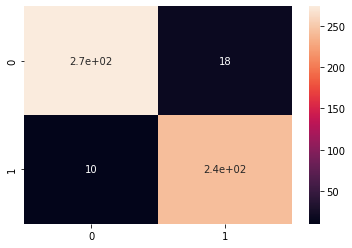


classification report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       292
           1       0.93      0.96      0.95       253

    accuracy                           0.95       545
   macro avg       0.95      0.95      0.95       545
weighted avg       0.95      0.95      0.95       545



array([[274,  18],
       [ 10, 243]], dtype=int64)

In [61]:
print("Training Accuracy :", Ridge.score(X_train, y_train))
print("Testing Accuracy :", Ridge.score(X_test, y_test))

confusion = confusion_matrix(y_test, prediction)

sns.heatmap(confusion, annot = True)
plt.show()
print('\nclassification report')

#Predicting on test
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

In [62]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves=",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, prediction)
f1 = f1_score(y_test, prediction)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

ROC Curves= 0.9494152363419784
Precision-Recall Curves = 0.9549287074561135


In [63]:
print('Random Forest: Precision = ',str(round(precision_score(y_test, prediction,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(y_test, prediction,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(y_test, prediction)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(y_test, prediction,pos_label='positive',average='micro')*100,1)), '%')

Random Forest: Precision =  94.9 %
Random Forest: Recall =  94.9 %
Random Forest: Accuracy =  94.9 %
Random Forest: F1-Score =  94.9 %


ROC AUC Score:  94.9 %


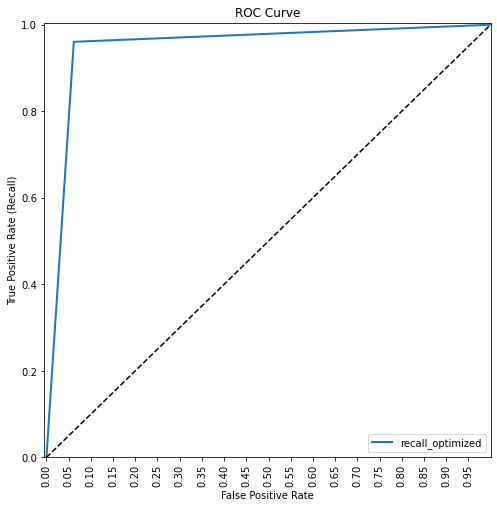

In [64]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

fpr, tpr, auc_thresholds = roc_curve(y_test, prediction)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

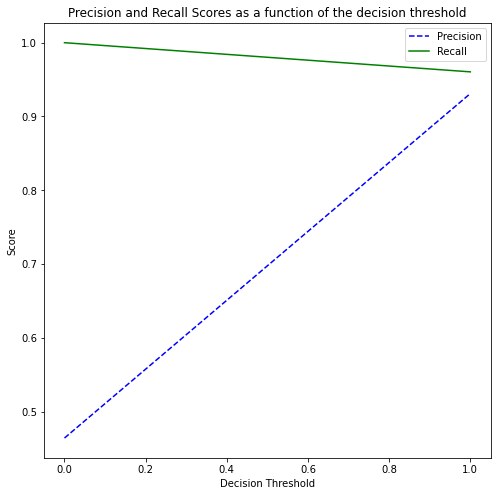

In [65]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

p, r, thresholds = precision_recall_curve(y_test, prediction)
plot_precision_recall_vs_threshold(p, r, thresholds)


# KNeighborsClassifier 2rd algorithm model (perfect)

In [66]:
KNeighbors = KNeighborsClassifier()
#Fitting the training data
KNeighbors.fit(xres,yres)
Validation = cross_val_score(KNeighbors, X_train, y_train)

print("cross-validation mean score: %.2f" % Validation.mean())
kfold_score = cross_val_score(KNeighbors, X_train, y_train)

print("average score kfold: %.2f" % kfold_score.mean())
#Predicting on test
predi=KNeighbors.predict(X_test)

cross-validation mean score: 0.95
average score kfold: 0.95


Training Accuracy : 0.9596330275229358
Testing Accuracy : 0.9467889908256881


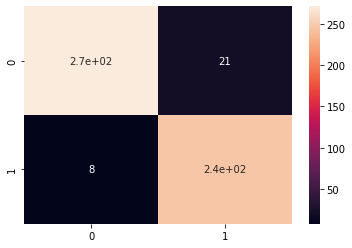


classification report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       292
           1       0.92      0.97      0.94       253

    accuracy                           0.95       545
   macro avg       0.95      0.95      0.95       545
weighted avg       0.95      0.95      0.95       545



array([[271,  21],
       [  8, 245]], dtype=int64)

In [67]:

print("Training Accuracy :", KNeighbors.score(X_train, y_train))
print("Testing Accuracy :", KNeighbors.score(X_test, y_test))
MATRIX = confusion_matrix(y_test, predi)

sns.heatmap(MATRIX, annot = True)
plt.show()
print('\nclassification report')
print(classification_report(y_test, predi))
confusion_matrix(y_test, predi)


In [68]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predi)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
print("ROC Curves=",roc_auc1)

precision, recall, thresholds = precision_recall_curve(y_test, predi)
f1 = f1_score(y_test, predi)
Precision = auc(recall, precision)
print("Precision-Recall Curves =",Precision)

ROC Curves= 0.9482308192105691
Precision-Recall Curves = 0.9520554886509162


In [69]:
print('Random Forest: Precision = ',str(round(precision_score(y_test, predi,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(y_test, predi,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(y_test, predi)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(y_test, predi,pos_label='positive',average='micro')*100,1)), '%')

Random Forest: Precision =  94.7 %
Random Forest: Recall =  94.7 %
Random Forest: Accuracy =  94.7 %
Random Forest: F1-Score =  94.7 %


ROC AUC Score:  94.8 %


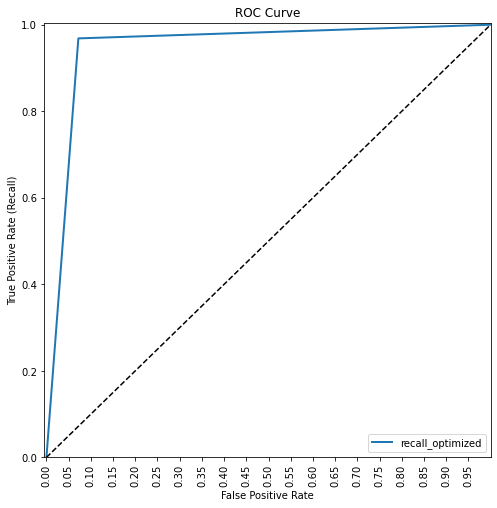

In [70]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

fpr, tpr, auc_thresholds = roc_curve(y_test, predi)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

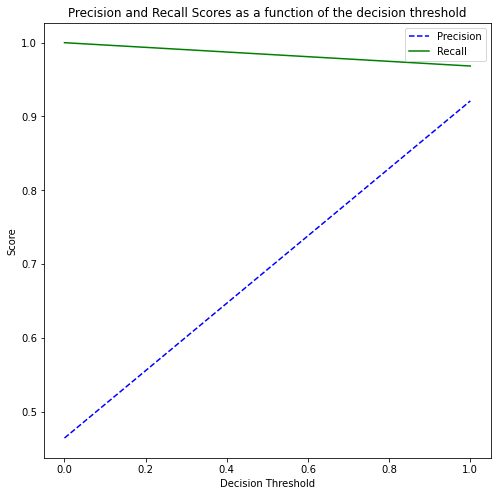

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

p, r, thresholds = precision_recall_curve(y_test, predi)
plot_precision_recall_vs_threshold(p, r, thresholds)

# LinearDiscriminantAnalysis 3nd algorithm model (perfect)

In [72]:
LinearDiscriminantAnalysis = LinearDiscriminantAnalysis()
#Fitting the training data
LinearDiscriminantAnalysis.fit(xres,yres)
Validationn = cross_val_score(LinearDiscriminantAnalysis, X_train, y_train)

print("cross-validation mean score: %.2f" % Validationn.mean())
kfold_scoree = cross_val_score(LinearDiscriminantAnalysis, X_train, y_train)

print("average score kfold: %.2f" % kfold_scoree.mean())
#Predicting on test
predii=LinearDiscriminantAnalysis.predict(X_test)

cross-validation mean score: 0.96
average score kfold: 0.96


Training Accuracy : 0.963302752293578
Testing Accuracy : 0.9486238532110092


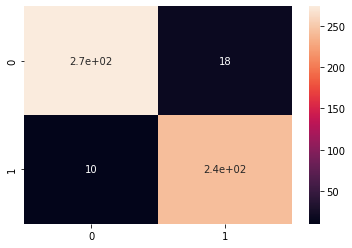


classification report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       292
           1       0.93      0.96      0.95       253

    accuracy                           0.95       545
   macro avg       0.95      0.95      0.95       545
weighted avg       0.95      0.95      0.95       545



array([[274,  18],
       [ 10, 243]], dtype=int64)

In [73]:

print("Training Accuracy :", LinearDiscriminantAnalysis.score(X_train, y_train))
print("Testing Accuracy :", LinearDiscriminantAnalysis.score(X_test, y_test))
MATRIXX = confusion_matrix(y_test, predii)

sns.heatmap(MATRIXX, annot = True)
plt.show()
print('\nclassification report')
print(classification_report(y_test, predii))
confusion_matrix(y_test, predii)


In [74]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predii)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print("ROC Curves=",roc_auc2)

precision, recall, thresholds = precision_recall_curve(y_test, predii)
f1 = f1_score(y_test, predii,pos_label='positive',average='micro')
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

ROC Curves= 0.9494152363419784
Precision-Recall Curves = 0.9549287074561135


In [75]:
print('Random Forest: Precision = ',str(round(precision_score(y_test, predii,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(y_test, predii,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(y_test, predii)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(y_test, predii,pos_label='positive',average='micro')*100,1)), '%')

Random Forest: Precision =  94.9 %
Random Forest: Recall =  94.9 %
Random Forest: Accuracy =  94.9 %
Random Forest: F1-Score =  94.9 %


ROC AUC Score:  94.9 %


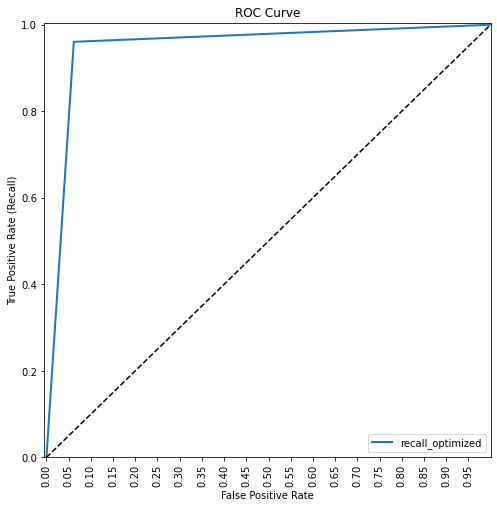

In [76]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

fpr, tpr, auc_thresholds = roc_curve(y_test, predii)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

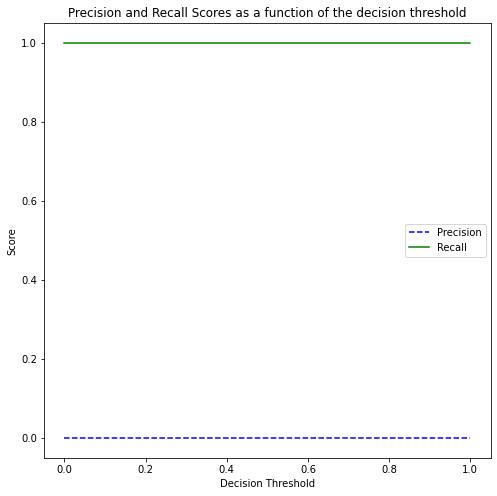

In [77]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

p, r, thresholds = precision_recall_curve(y_test, predii, pos_label =2)
plot_precision_recall_vs_threshold(p, r, thresholds)

# LogisticRegression 4 algorithm model (perfect)


In [78]:
from sklearn.linear_model import LogisticRegression

# Incorrect
LogisticRegression = LogisticRegression()

#Fitting the training data
LR =LogisticRegression.fit(X_train, y_train)
Validatio = cross_val_score(LR, X_train, y_train)

print("cross-validation mean score: %.2f" % Validatio.mean())
kfol = cross_val_score(LR, X_train, y_train)

print("average score kfold: %.2f" % kfol.mean())
#Predicting on test
prediU=LR.predict(X_test)

cross-validation mean score: 0.93
average score kfold: 0.93


Training Accuracy : 0.9327217125382263
Testing Accuracy : 0.9284403669724771


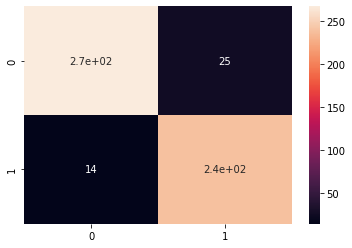


classification report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       292
           1       0.91      0.94      0.92       253

    accuracy                           0.93       545
   macro avg       0.93      0.93      0.93       545
weighted avg       0.93      0.93      0.93       545



array([[267,  25],
       [ 14, 239]], dtype=int64)

In [79]:

print("Training Accuracy :", LogisticRegression.score(X_train, y_train))
print("Testing Accuracy :", LogisticRegression.score(X_test, y_test))
MATRIXXY = confusion_matrix(y_test, prediU)

sns.heatmap(MATRIXXY, annot = True)
plt.show()
print('\nclassification report')
print(classification_report(y_test, prediU))
confusion_matrix(y_test, prediU)


In [80]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,prediU)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves=",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, prediU)
f1 = f1_score(y_test, predii,pos_label='positive',average='micro')
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

ROC Curves= 0.9295237966321944
Precision-Recall Curves = 0.9378275676590395


In [81]:
print('Random Forest: Precision = ',str(round(precision_score(y_test, prediU,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(y_test, prediU,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(y_test, prediU)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(y_test, prediU,pos_label='positive',average='micro')*100,1)), '%')

Random Forest: Precision =  92.8 %
Random Forest: Recall =  92.8 %
Random Forest: Accuracy =  92.8 %
Random Forest: F1-Score =  92.8 %


ROC AUC Score:  93.0 %


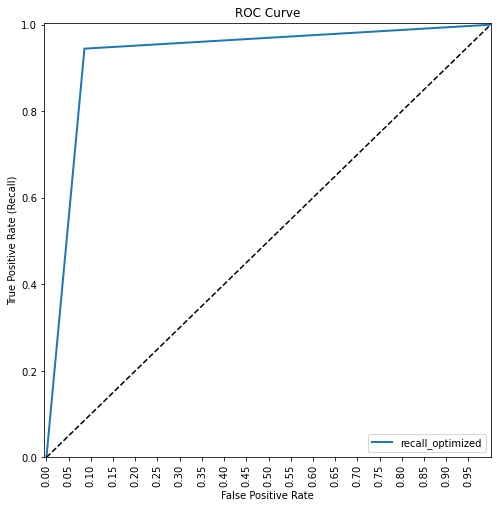

In [82]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

fpr, tpr, auc_thresholds = roc_curve(y_test, prediU)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

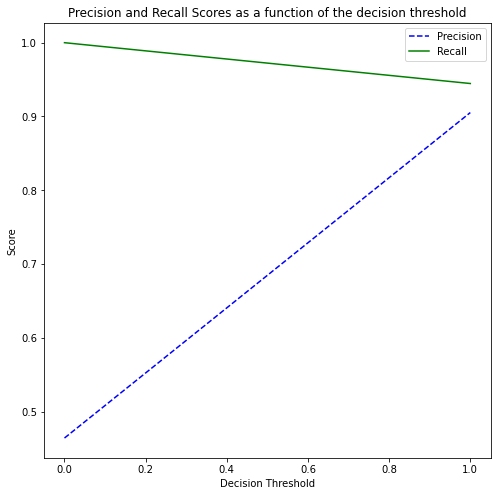

In [83]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

p, r, thresholds = precision_recall_curve(y_test, prediU)
plot_precision_recall_vs_threshold(p, r, thresholds)

# NearestCentroid algorithm 5 model (perfect)

In [84]:

NearestCentroid = NearestCentroid()
#Fitting the training data
NearestCentroid.fit(xres,yres)
Cross = cross_val_score(NearestCentroid, X_train, y_train)

print("cross-validation mean score: %.2f" % Cross.mean())
Cross_K = cross_val_score(NearestCentroid, X_train, y_train)

print("average score kfold: %.2f" % Cross_K.mean())
#Predicting on test
#Predicting on test
y_prre=NearestCentroid.predict(X_test)

cross-validation mean score: 0.71
average score kfold: 0.71


Training Accuracy : 0.7162079510703364
Testing Accuracy : 0.6954128440366972


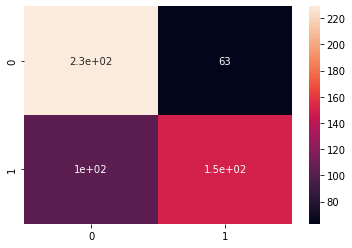


classification report
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       292
           1       0.70      0.59      0.64       253

    accuracy                           0.70       545
   macro avg       0.70      0.69      0.69       545
weighted avg       0.70      0.70      0.69       545

[[229  63]
 [103 150]]


In [85]:

print("Training Accuracy :", NearestCentroid.score(X_train, y_train))
print("Testing Accuracy :", NearestCentroid.score(X_test, y_test))

uuy = confusion_matrix(y_test, y_prre)

sns.heatmap(uuy, annot = True)
plt.show()
print('\nclassification report')
print(classification_report(y_test, y_prre))
print(confusion_matrix(y_test, y_prre))


In [86]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_prre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves=",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_prre)
f1 = f1_score(y_test, y_prre,pos_label='positive',average='micro')
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

ROC Curves= 0.6885659754182686
Precision-Recall Curves = 0.7430507766474103


In [87]:
print('Random Forest: Precision = ',str(round(precision_score(y_test, y_prre,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(y_test, y_prre,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(y_test, y_prre)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(y_test, y_prre,pos_label='positive',average='micro')*100,1)), '%')

Random Forest: Precision =  69.5 %
Random Forest: Recall =  69.5 %
Random Forest: Accuracy =  69.5 %
Random Forest: F1-Score =  69.5 %


ROC AUC Score:  68.9 %


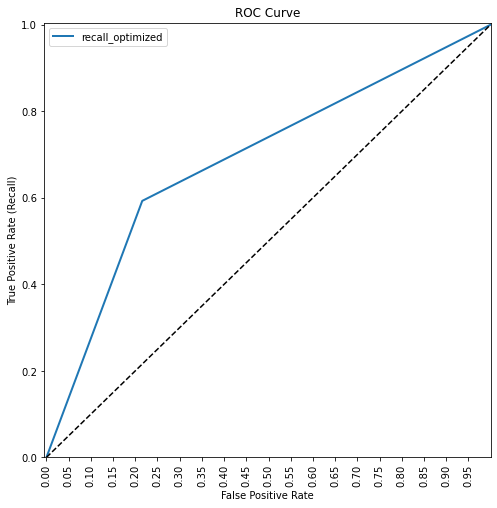

In [88]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

fpr, tpr, auc_thresholds = roc_curve(y_test, y_prre)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

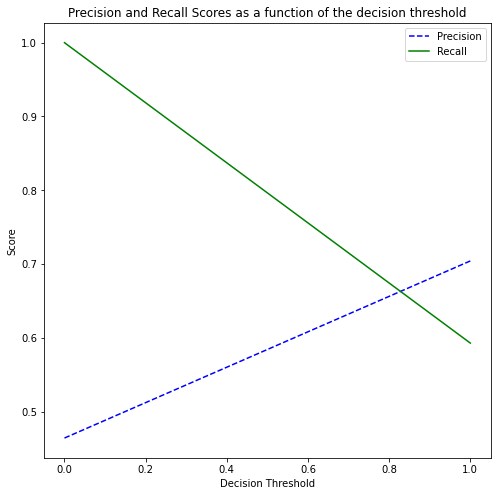

In [89]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

p, r, thresholds = precision_recall_curve(y_test, y_prre)
plot_precision_recall_vs_threshold(p, r, thresholds)

# SVC 6 algorithm model

In [90]:
from sklearn.svm import SVC
SVC = SVC()

SV =SVC.fit(xres,yres)
Cros = cross_val_score(SV, X_train, y_train)

print("cross-validation mean score: %.2f" % Cros.mean())
Cros_K = cross_val_score(SV, X_train, y_train)

print("average score kfold: %.2f" % Cross_K.mean())
#Predicting on test
#Predicting on test
y_pre33=SV.predict(X_test)

cross-validation mean score: 0.96
average score kfold: 0.71


Training Accuracy : 0.963914373088685
Testing Accuracy : 0.9669724770642202


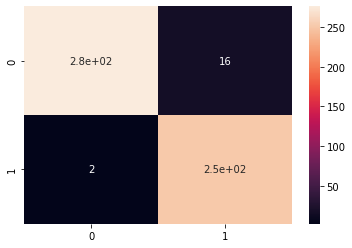


classification report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       292
           1       0.94      0.99      0.97       253

    accuracy                           0.97       545
   macro avg       0.97      0.97      0.97       545
weighted avg       0.97      0.97      0.97       545

[[276  16]
 [  2 251]]


In [91]:

print("Training Accuracy :", SVC.score(X_train, y_train))
print("Testing Accuracy :", SVC.score(X_test, y_test))

mm = confusion_matrix(y_test, y_pre33)

sns.heatmap(mm, annot = True)
plt.show()
print('\nclassification report')

print(classification_report(y_test, y_pre33))
print(confusion_matrix(y_test, y_pre33))


In [92]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pre33)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves=",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pre33)
f1 = f1_score(y_test, y_pre33,pos_label='positive',average='micro')
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

ROC Curves= 0.968650170556067
Precision-Recall Curves = 0.9679197463988812


In [93]:
print('Random Forest: Precision = ',str(round(precision_score(y_test, y_pre33,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(y_test, y_pre33,pos_label='positive',average='micro')*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(y_test, y_pre33)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(y_test, y_pre33,pos_label='positive',average='micro')*100,1)), '%')

Random Forest: Precision =  96.7 %
Random Forest: Recall =  96.7 %
Random Forest: Accuracy =  96.7 %
Random Forest: F1-Score =  96.7 %


ROC AUC Score:  96.9 %


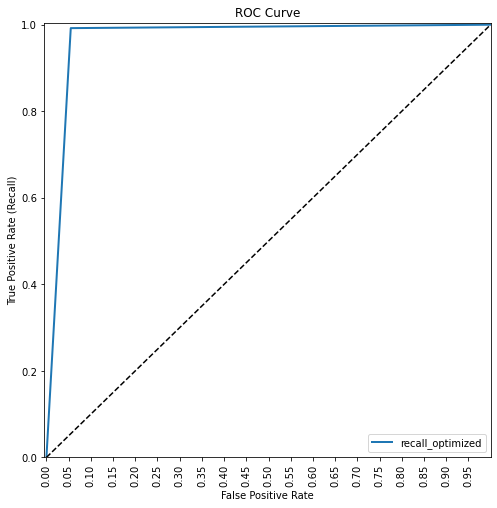

In [94]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

fpr, tpr, auc_thresholds = roc_curve(y_test, y_pre33)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

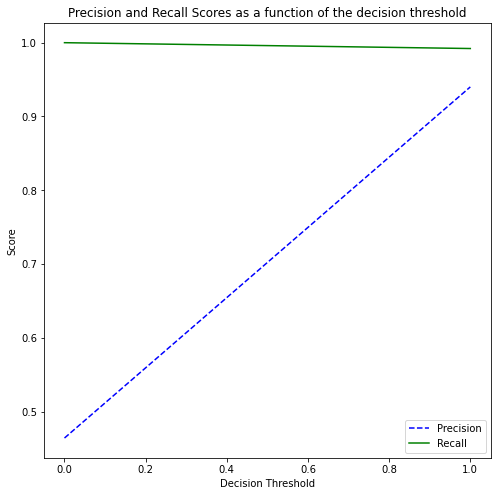

In [95]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

p, r, thresholds = precision_recall_curve(y_test, y_pre33)
plot_precision_recall_vs_threshold(p, r, thresholds)